In [180]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [181]:
data = pd.read_csv("C:\Z_Sem6_Project\YoutubeCommentScrapping\HindiTrainingDataset.csv")
data = data.drop("Unnamed: 0", axis='columns')
data

,Comment,AuthorName,AuthorChannelId,PublishedDate,LikeCount,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"This <a href=""http://www.youtube.com/results?s...",Sex Shiksha,UChqxgpNXTcYA9SnHZ49Ag4Q,3/6/2023,63,0,0,0,0,0,0
1,Where can I Buy link please 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,Rita Anish,UCplg9nI_mYqxigX-uwei3dg,4/6/2023,0,0,0,0,0,0,0
2,But i fall in love with you the you deliver th...,Vijay Prakash,UCurRVe8keAXBvHTRmLcTcEQ,4/4/2023,0,0,0,1,0,0,0
3,Apko kiss nhi chahiye kya,Md Afridi,UC4E3gtcxSZbqC4wRlmgw8yA,4/1/2023,0,1,0,1,0,0,0
4,I just wanna kiss you,Tiwa Jean,UCOzZcdWAHGA8Qg0XIizxnug,3/31/2023,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2085,Aap bhi aese hi kapde pahna chalu kr do wow k...,SHINE STAR,UCKCdsnBBA1k6nTCLVXuCt0g,26-03-2023,0,1,0,0,0,0,0
2086,tujhse achi modern to hmari bhais h ek bhi Kap...,Sheetal Pal,UC7kh5ZRSmdLxWxsPdOsp-qA,20-03-2023,9,0,0,1,0,0,0
2087,Besharam aurat,shamar Hussain,UCrB9cAeUMVaI2u0-E1klWIA,18-03-2023,0,0,1,0,0,0,1
2088,Aap bohot pyari lag rahi ho❤❤❤❤,Lalman Gaur,UCExtOJTE-lv5dSyuE7sZFIw,18-03-2023,1,0,0,0,0,0,0


In [182]:
labeled_train_data = data.drop(["AuthorName", "AuthorChannelId", "PublishedDate", "LikeCount"], axis='columns')
labeled_train_data

,Comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"This <a href=""http://www.youtube.com/results?s...",0,0,0,0,0,0
1,Where can I Buy link please 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0,0,0,0,0,0
2,But i fall in love with you the you deliver th...,0,0,1,0,0,0
3,Apko kiss nhi chahiye kya,1,0,1,0,0,0
4,I just wanna kiss you,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2085,Aap bhi aese hi kapde pahna chalu kr do wow k...,1,0,0,0,0,0
2086,tujhse achi modern to hmari bhais h ek bhi Kap...,0,0,1,0,0,0
2087,Besharam aurat,0,1,0,0,0,1
2088,Aap bohot pyari lag rahi ho❤❤❤❤,0,0,0,0,0,0


<b>Data Visualization</b>

In [183]:
# creating new column named "total_classes" which will show total no. of classes comment belongs to
# if we take sum of all labels we can tell how many classes comment belong to 
# for ex. if comment belongs to "toxic" and "threat" then the sum will be 2
labeled_train_data["total_classes"] = labeled_train_data.iloc[:,1:7].apply(lambda x: sum(x), axis=1)
labeled_train_data

,Comment,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes
0,"This <a href=""http://www.youtube.com/results?s...",0,0,0,0,0,0,0
1,Where can I Buy link please 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0,0,0,0,0,0,0
2,But i fall in love with you the you deliver th...,0,0,1,0,0,0,1
3,Apko kiss nhi chahiye kya,1,0,1,0,0,0,2
4,I just wanna kiss you,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
2085,Aap bhi aese hi kapde pahna chalu kr do wow k...,1,0,0,0,0,0,1
2086,tujhse achi modern to hmari bhais h ek bhi Kap...,0,0,1,0,0,0,1
2087,Besharam aurat,0,1,0,0,0,1,2
2088,Aap bohot pyari lag rahi ho❤❤❤❤,0,0,0,0,0,0,0


In [184]:
# Total labeled comments from each class
# it helps in finding the variation among class
# and to make sure the dataset is not skewed towards any class
Total_of_Class = {}
for col in labeled_train_data.iloc[:,1:7].columns:
    Total_of_Class[col] = len(labeled_train_data) - labeled_train_data[col].value_counts()[0]
    print(f"{col} : {Total_of_Class[col]}\n")

Total_of_Class['non_toxic'] = labeled_train_data['total_classes'].value_counts()[0]

toxic : 535

severe_toxic : 370

obscene : 491

threat : 121

insult : 297

identity_hate : 102



In [185]:
# finding out about the total number of classes a comments belong to
multi_label_total = {}
for value in labeled_train_data["total_classes"].unique():
    multi_label_total[value] = labeled_train_data["total_classes"].value_counts()[value]
multi_label_total

{0: 867, 1: 714, 2: 368, 3: 104, 4: 31, 5: 6}

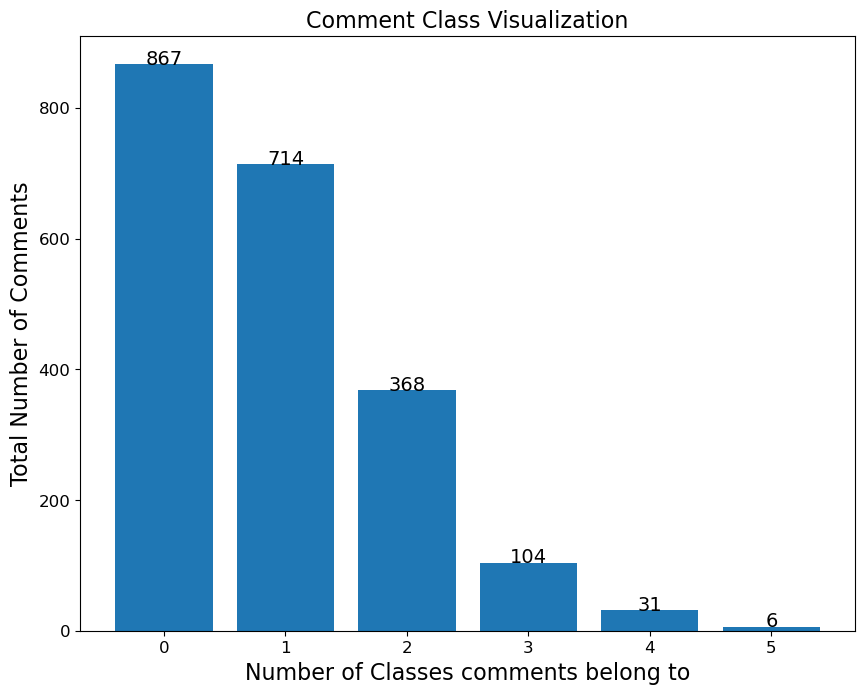

In [186]:
# Creating Graphs for multi-labeled Data Visualization
plt.figure(figsize=(10, 17))

# Visualizing data including non-toxic comments
klst= list(multi_label_total.keys())
vlst = list(multi_label_total.values())
fr = plt.subplot(2,1,1)
# plt.barh(width=vlst,y=klst)
plt.bar(height=vlst,x=klst)
fr.set_ylabel("Total Number of Comments", fontsize=16)
fr.set_xlabel("Number of Classes comments belong to", fontsize=16)
fr.set_title("Comment Class Visualization", fontsize=16)
for key in klst:
    fr.annotate(text=multi_label_total[key], xy=(key, multi_label_total[key]), xycoords="data", color="black", size=14, ha="center")


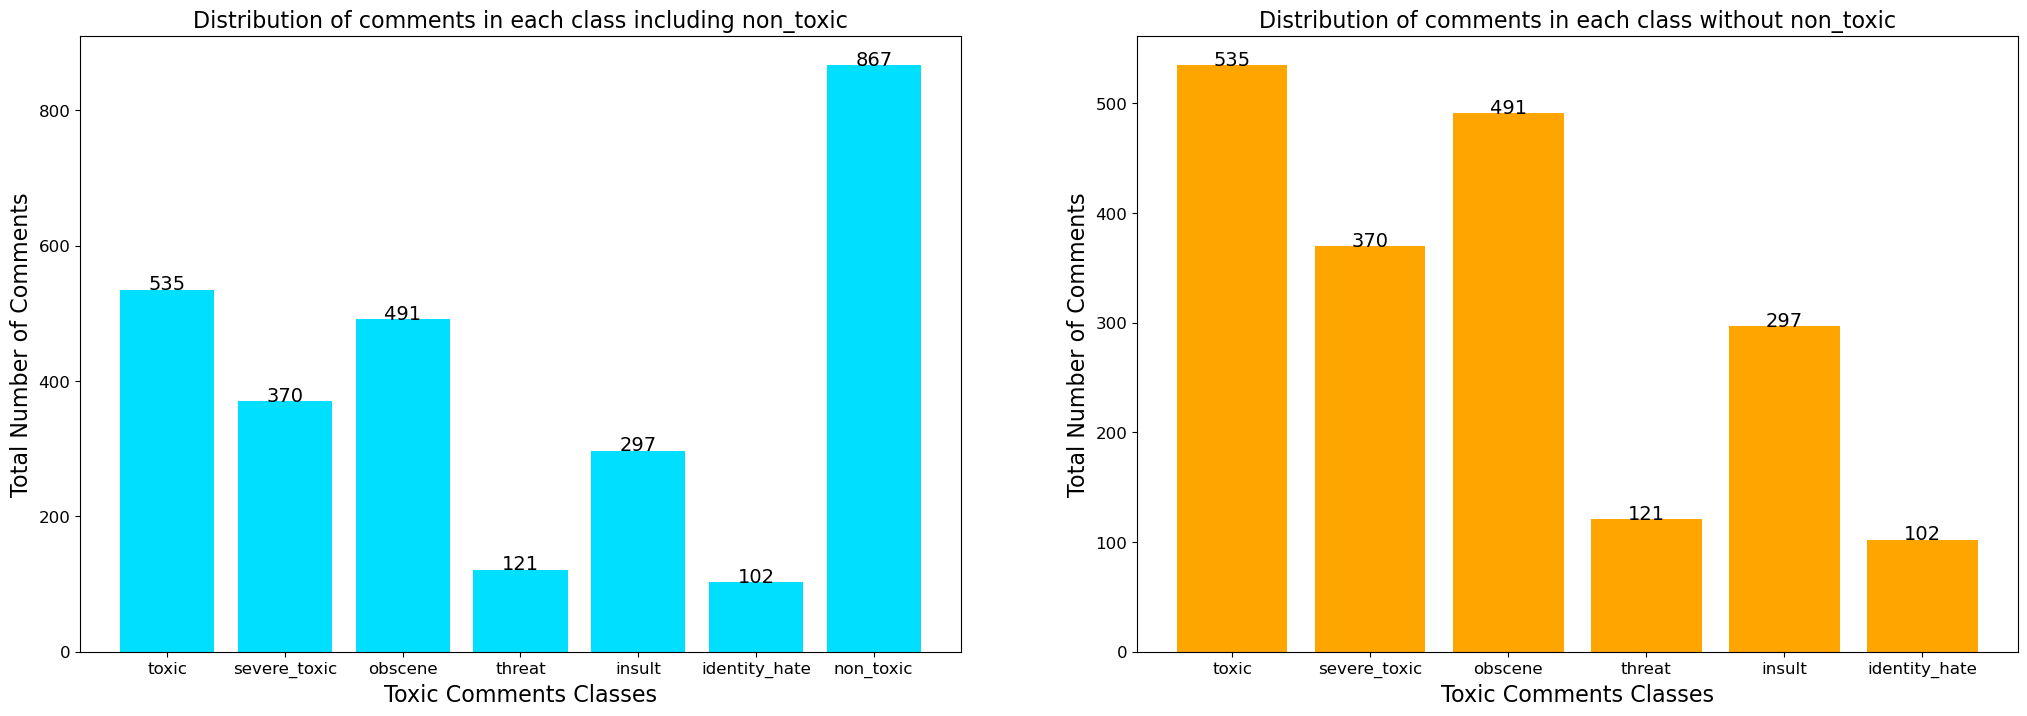

In [187]:
# plotting distribution of classes 

font1 = {"size":12}
all_tox = list(Total_of_Class.values())
plt.figure(figsize=(25,8))
#plt.rcParams.update({'font.size': 12})
plt.rc("font",**font1)

left = plt.subplot(1,2,1)
plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic'], height = Total_of_Class.values(), color="#00DFFF")
left.set_facecolor("white")
left.set_ylabel("Total Number of Comments", fontsize=16)
left.set_xlabel("Toxic Comments Classes", fontsize=16)
left.set_title("Distribution of comments in each class including non_toxic", fontsize=16)
for key in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','non_toxic']:
    left.annotate(text=Total_of_Class[key], xy=(key,Total_of_Class[key]), xycoords="data", color="black", size=14, ha="center")

right = plt.subplot(1,2,2)
plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], height = all_tox[:-1], color="orange")
right.set_facecolor("white")
right.set_ylabel("Total Number of Comments", fontsize=16)
right.set_xlabel("Toxic Comments Classes", fontsize=16)
right.set_title("Distribution of comments in each class without non_toxic", fontsize=16)
for key in ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']:
    right.annotate(text=Total_of_Class[key], xy=(key,Total_of_Class[key]), xycoords="data", color="black", size=14, ha="center")

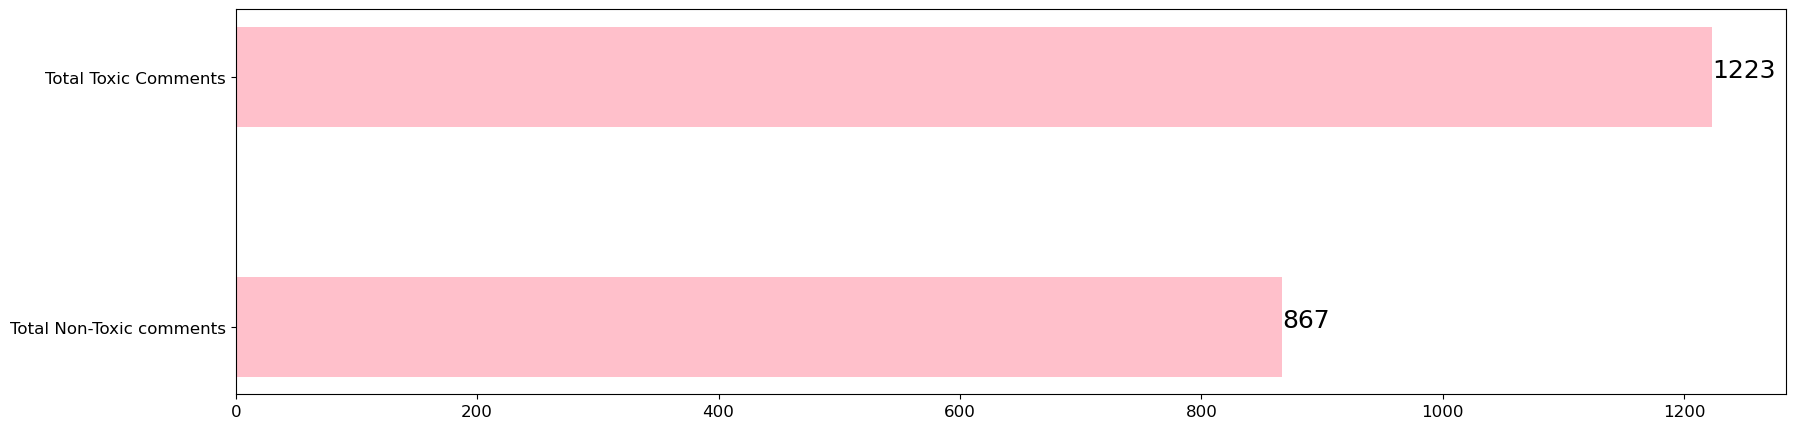

In [188]:
# plot of total of all toxic classes and non toxic
temp = {"Total Non-Toxic comments": Total_of_Class['non_toxic'], "Total Toxic Comments": len(labeled_train_data) - Total_of_Class['non_toxic']}

plt.figure(figsize=(20,5))
subp = plt.subplot(1,1,1)
subp.set_facecolor("white")

plt.barh(width=[Total_of_Class['non_toxic'],len(labeled_train_data) - Total_of_Class['non_toxic']], y=["Total Non-Toxic comments", "Total Toxic Comments"], height=0.4, color="pink")
for key in temp.keys():
    subp.annotate(text=temp[key], xy=(temp[key],key), xycoords="data", color="black", size=18)

<b>Pre-Processing</b>

In [189]:
import re

# creating copy of data for data cleaning and preprocessing
cleaned_train_data = labeled_train_data.copy()

In [190]:
# Removing Hyperlinks from text
# The below code is a re pattern that matches URLs beginning with http or https, followed by :// and one or more 
# non-whitespace characters, or URLs beginning with www., followed by one or more non-whitespace characters. 

cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r'http\S+', '', x))

print(labeled_train_data.loc[0,"Comment"],"\n\n")
print("++++ After Removing URLs ++++\n\n ")
print(cleaned_train_data.loc[0,"Comment"])

This <a href="http://www.youtube.com/results?search_query=%23tech">#tech</a>🤖 will solve everything for long distance <a href="http://www.youtube.com/results?search_query=%23couples">#couples</a>😍 


++++ After Removing URLs ++++

 
This <a href=" will solve everything for long distance <a href="


In [191]:
# Removing emojis from text
cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub("["
                                                                                   u"\U0001F600-\U0001F64F"
                                                                                   u"\U0001F300-\U0001F5FF"  
                                                                                   u"\U0001F680-\U0001F6FF" 
                                                                                   u"\U0001F1E0-\U0001F1FF"  
                                                                                   u"\U00002702-\U000027B0"
                                                                                   u"\U000024C2-\U0001F251"
                                                                                   "]+","", x, flags=re.UNICODE))
print(labeled_train_data.loc[85,"Comment"],"\n\n")
print("++++ After Removing emojis ++++\n\n ")
print(cleaned_train_data.loc[85,"Comment"])

Kheyali pulav 😅😂😂😂😂😂 


++++ After Removing emojis ++++

 
Kheyali pulav 


In [192]:
# # Removing IP addresses from text 
# # The below code is a re pattern that matches a string of four groups of digits separated by dots, 
# # where each group consists of one to three digits.
# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing IP Address ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [193]:
# # Removing html tags from text 
# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"<.*?>","",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing HTML Tags ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [194]:
# # There are some comments which contain double quoted words like --> ""words""  we will convert these to --> "words" 

# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"\"\"", "\"",x))   # replacing "" with "
# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"^\"", "",x))      # removing quotation from start and the end of the string
# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"\"$", "",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing Double Quote ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [195]:
# # Removing Punctuation / Special characters (;:'".?@!%&*+) which appears more than twice in the text 

# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s][^a-zA-Z0-9\s]+", " ",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing Punctuation ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [196]:
# # Removing Special characters 

# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s\"\',:;?!.()]", " ",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing Special Characters ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [197]:
# # Removing extra spaces in text

# cleaned_train_data["Comment"] = cleaned_train_data["Comment"].map(lambda x: re.sub(r"\s\s+", " ",x))

# print(labeled_train_data.loc[0,"Comment"],"\n\n")
# print("++++ After Removing Extra Spaces ++++\n\n ")
# print(cleaned_train_data.loc[0,"Comment"])

In [198]:
cleaned_train_data.reset_index(inplace=True)
cleaned_train_data.drop(columns=["index"], inplace=True)
Final_data = cleaned_train_data.copy()

In [199]:
# Keeping 15291 comments from non_toxic comments and dropping the rest

# Finding out the index where non-toxic comments are present
C_indexs = cleaned_train_data[cleaned_train_data["total_classes"]==0].index

# randonmly selecting the 75% of the non_toxic comments
drop_indxs = np.random.choice(C_indexs, size=(int)(len(C_indexs)*0), replace=False)

# dropping the randomly selected non_toxic comments from datasets
Final_data.drop(drop_indxs, inplace=True)

In [200]:
Final_data.reset_index(inplace=True)
Final_data.drop(columns=["index"], inplace=True)
Final_data

,Comment,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes
0,"This <a href="" will solve everything for long ...",0,0,0,0,0,0,0
1,Where can I Buy link please 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0,0,0,0,0,0,0
2,But i fall in love with you the you deliver th...,0,0,1,0,0,0,1
3,Apko kiss nhi chahiye kya,1,0,1,0,0,0,2
4,I just wanna kiss you,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
2085,Aap bhi aese hi kapde pahna chalu kr do wow k...,1,0,0,0,0,0,1
2086,tujhse achi modern to hmari bhais h ek bhi Kap...,0,0,1,0,0,0,1
2087,Besharam aurat,0,1,0,0,0,1,2
2088,Aap bohot pyari lag rahi ho,0,0,0,0,0,0,0


In [201]:
Final_data.to_csv("C:\\Users\\as041\\OneDrive\\Desktop\\NLP\\Implementation\\Dataset\\HindiTrainDataset.csv")